In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df = pd.read_csv("mental_health_dataset.csv")
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [11]:
df.describe ()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [13]:
#Missing values
print("Saknade värden:")
print(df.isnull().sum())

Saknade värden:
User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64


In [15]:
# 2. Identifiering och hantering av outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


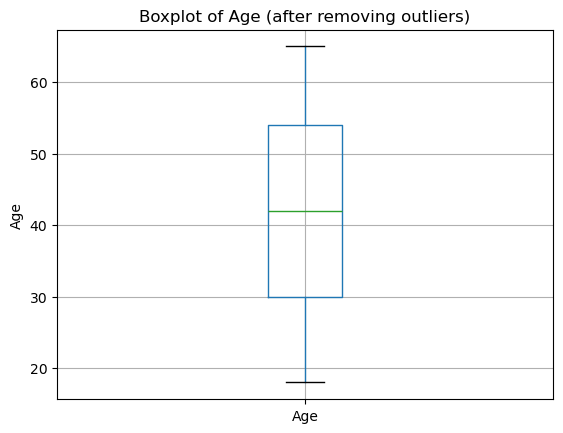

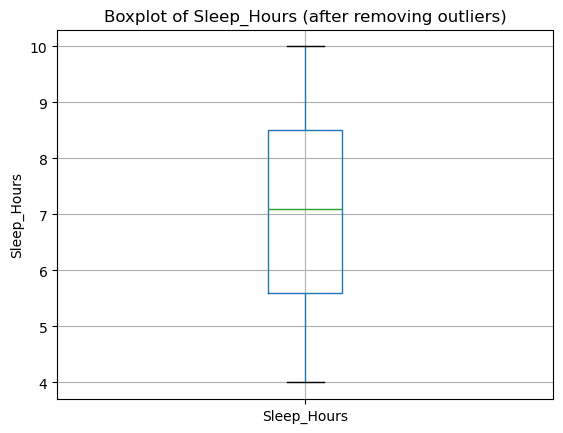

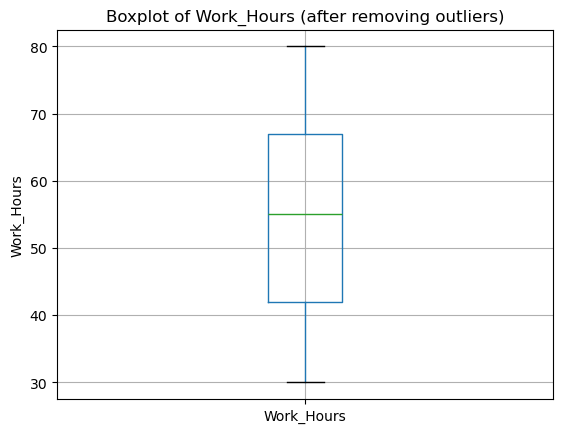

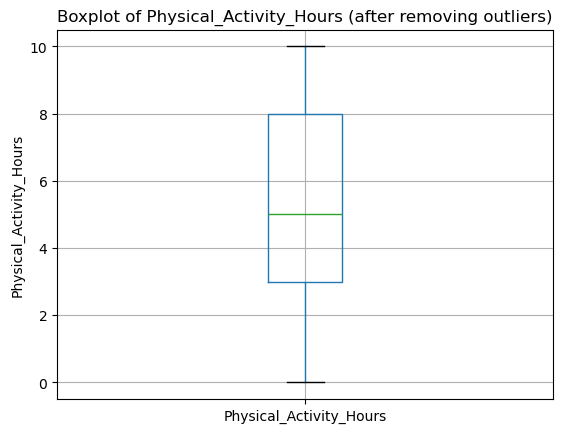

In [17]:
# Ta bort outliers för specifika kolumner
for column in ['Work_Hours', 'Physical_Activity_Hours']:
    df = remove_outliers(df, column)

# Visualisera boxplots efter att ha tagit bort outliers
numerical_columns = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']
for column in numerical_columns:
    plt.figure()
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column} (after removing outliers)')
    plt.ylabel(column)
    plt.show()


Fördelning av Mental_Health_Condition:
Mental_Health_Condition
Yes    0.515
No     0.485
Name: proportion, dtype: float64


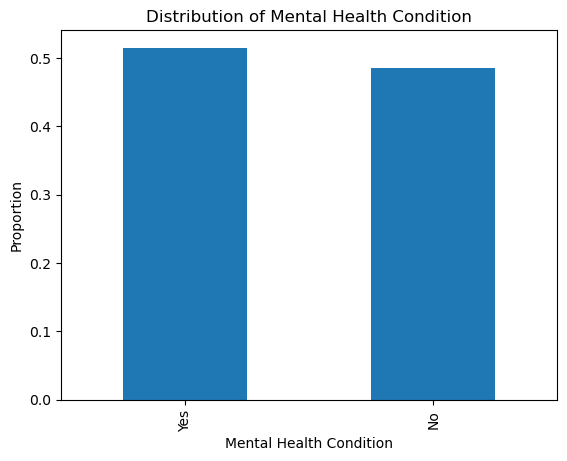

In [19]:
# 3. Kontroll av datans balans
mental_health_distribution = df['Mental_Health_Condition'].value_counts(normalize=True)
print("Fördelning av Mental_Health_Condition:")
print(mental_health_distribution)

# Visualisera fördelningen
mental_health_distribution.plot(kind='bar', title='Distribution of Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Proportion')
plt.show()

Klassificeringsrapport:
              precision    recall  f1-score   support

           0       0.61      0.49      0.54       102
           1       0.56      0.67      0.61        98

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.59      0.58      0.58       200

Konfusionsmatris:
[[50 52]
 [32 66]]
De viktigaste faktorerna:
Work_Hours                  0.148002
Age                         0.147202
Sleep_Hours                 0.147028
Physical_Activity_Hours     0.108141
Stress_Level_Low            0.022779
Gender_Prefer not to say    0.022298
Consultation_History_No     0.021775
Gender_Non-binary           0.021402
Gender_Male                 0.021055
Occupation_Education        0.020453
dtype: float64


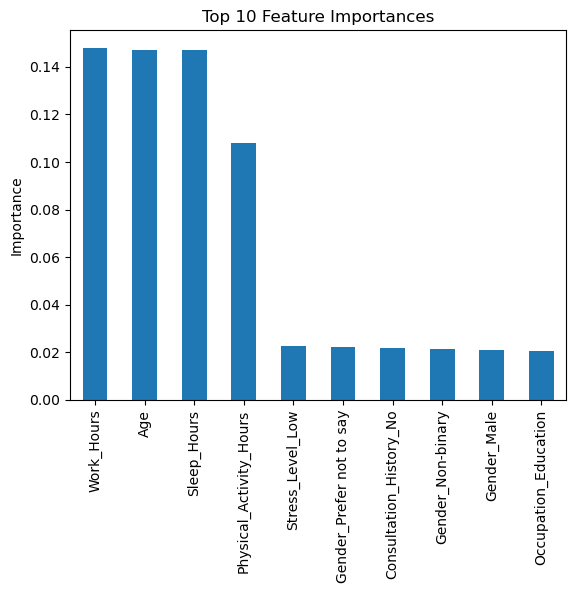

Yrken med högst psykisk ohälsa:
Occupation
Sales          0.540741
Other          0.534161
IT             0.511278
Finance        0.510791
Engineering    0.506757
Healthcare     0.503356
Education      0.496296
Name: Mental_Health_Condition, dtype: float64


In [21]:
# 4. Modellering med Random Forest
# Kodning av kategoriska variabler och förberedelse av features/target
df_encoded = pd.get_dummies(df, columns=['Gender', 'Occupation', 'Country', 'Stress_Level', 'Consultation_History'])
X = df_encoded.drop(columns=['User_ID', 'Mental_Health_Condition', 'Severity'])
y = df['Mental_Health_Condition'].map({'Yes': 1, 'No': 0})

# Dela upp datasetet i tränings- och testmängder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Träna en Random Forest-modell
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Utvärdera modellen
y_pred = rf_model.predict(X_test)
print("Klassificeringsrapport:")
print(classification_report(y_test, y_pred))
print("Konfusionsmatris:")
print(confusion_matrix(y_test, y_pred))

# 5. Viktiga faktorer och yrken
# Identifiera de viktigaste faktorerna
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("De viktigaste faktorerna:")
print(feature_importances.head(10))

# Visualisera de viktigaste faktorerna
feature_importances.head(10).plot(kind='bar', title='Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()

# Yrken med högst andel psykisk ohälsa
occupation_mental_health = df.groupby('Occupation')['Mental_Health_Condition'].apply(lambda x: (x == 'Yes').mean())
print("Yrken med högst psykisk ohälsa:")
print(occupation_mental_health.sort_values(ascending=False).head(10))


In [24]:
!pip install imbalanced-learn
!pip install xgboost
from xgboost import XGBClassifier




In [26]:
# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE